<a href="https://colab.research.google.com/github/ph7klw76/Applied-Quantum-Mechanics/blob/main/The_Eigenvalue_Problem_Power_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Power iteration is the simplest method to calculate the eigenvalues of a
matrix.it is diagonalisable, or equivalently, it has N linearly independent eigenvectors.its eigenvalues can be ordered like |$λ_{1}$| > |$λ_{2}$| ≥ ··· ≥ |$λ_{N}$|. The largest (absolute) eigenvalue and its associated eigenvector v1 are referred to as the **dominant** eigenvalue and **dominant** eigenvector. Cosider linear combination of the eigenvectors:


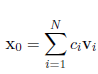

Let’s multiply this expansion by $A^n$

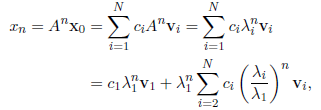

where we have factored out $λ^n_{1}$ in the last step. Now, taking the limit n→∞, we find that

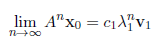

What if |$λ_{1}$| > 1?While the power iteration should still approach
the largest eigenvector, every successive iteration will result in a larger
and larger vector. If this happens too quickly, we might approach the
maximum value floating point number we can store in memory before
convergence is reached. To avoid this, we can simply normalise $A^n$x
at each iteration — this is called the normalised power iteration.
After using the power iteration to approximate the largest (normalised) eigenvector, we can employ the Rayleigh quotient to determine the associated largest eigenvalue

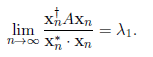

Use the normalised power iteration to find the dominant eigenvalue and
associated eigenvector of the Hermitian matrix
 \begin{pmatrix}
  4 & -i & 2 \\
  i & 2 & 2+7i \\
  2 & 2-7i & -2
 \end{pmatrix}

In [ ]:
import numpy as np
# function to calculate the Rayleigh quotient
def Check_Hermitian(A):
    z=np.matrix(A)
    return np.allclose(z,z.getH())

def rayleigh_quotient(A,x):
    if Check_Hermitian(A)==True:
        return np.dot(x, np.dot(A, x))/np.dot(x,x)  
# function to normalise a vector
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N
def Rayleigh_quotient(A,x):
    try:
        RQnew = rayleigh_quotient(A,x)
        RQold = 0
        i=0
    # perform the power iteration
        while np.abs(RQnew-RQold) > 1e-10:
            RQold = RQnew
            x = normalise(np.dot(A, x))
            RQnew = rayleigh_quotient(A, x)
            if i%20==0:
                print('interaction=',i,RQnew)
            i+=1
        print("Dominant eigenvector:",x)
        print("Dominant eigenvalue: {:.5f}".format(RQnew))
    except:
        print('Not a Hermitian')
    return x,RQnew
A = np.array([[4, -1j, 2],[1j, 2, 2+7j],[2, 2-7j, -2]])
x = normalise(np.array([1, 1, 1]))
x,RQnew= Rayleigh_quotient(A,x)

interaction= 0 (-6.571573604060915-1.2020304568527909j)
interaction= 20 (15.473534341873323-4.3731275317848j)
interaction= 40 (9.026644213750636-0.1629757137339398j)
interaction= 60 (8.524201876303408-0.018960452027119018j)
interaction= 80 (8.461439231341386-0.0024813779705511745j)
interaction= 100 (8.453149299157674-0.00032973432961062497j)
interaction= 120 (8.45204635394391-4.3905105026941314e-05j)
interaction= 140 (8.451899469573414-5.847671687072048e-06j)
interaction= 160 (8.45187990578419-7.78872805465504e-07j)
interaction= 180 (8.451877300003938-1.0374141240265056e-07j)
interaction= 200 (8.451876952928727-1.381775858355081e-08j)
interaction= 220 (8.451876906700257-1.8404511266401132e-09j)
interaction= 240 (8.451876900542894-2.4515733489240735e-10j)
interaction= 260 (8.45187689972276-3.265287816995824e-11j)
Dominant eigenvector: [0.33980972-0.23445694j 0.49134277+0.51067228j 0.50105938-0.27621534j]
Dominant eigenvalue: 8.45188+0.00000j


In [ ]:
B = np.array([[1,2,0],[-2,1,2],[1,3,1]])
y = normalise(np.array([1, 1, 2]))
y,RQnew= Rayleigh_quotient(B,y)
print("Dominant eigenvector:",y)
print("Dominant eigenvalue: {:.5f}".format(RQnew))


interaction= 0 2.9999999999999996
Dominant eigenvector: [0.40824829 0.40824829 0.81649658]
Dominant eigenvalue: 3.00000


Everyday you are likely interacting with a company that uses the power
iteration — Google! To determine which websites are more useful when
presenting you with search results, Google uses a **network centrality**
algorithm called PageRank. By representing internet sites as a network
of nodes with hyperlinks as connected edges, it turns out that information
containing the importance or centrality of each site is contained with
the dominant eigenvector. The power iteration is thus ideally suited for
Google’s needs

Recall that the convergence of the power iteration is completely dependent
on the ratio |$λ_{2}/λ_{1}$|, where $λ_{2}$ is the second highest eigenvalue